<a href="https://colab.research.google.com/github/aavella77/fft/blob/main/fft_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Fourier Transform (FFT) algorithm Tutorial
By [Alejandro Avella](https://aavella77.github.io/)

August 2022

This [Jupyter Notebook](https://jupyter.org/) can be executed in [Google Colab](https://colab.research.google.com/?utm_source=scs-index) and explores the Fast Fourier Algorithm as described the [1965 paper](https://github.com/aavella77/fft/blob/main/FFT-1965-paper-cooley-tukey.pdf) by James Cooley and John Tukey.

I was motivated to study this algorithm when I saw that the implementation is recursive and can be implemented in about 10 lines of Python code.  There are many things that we take for granted in today's world that are based on the FFT algorithm.  Some of the [applications](https://en.wikipedia.org/wiki/Fast_Fourier_transform#Applications) include Wifi and celular networks just to name a few of them.

**Reference:**
* From Python Numerical Methods from University of California, Berkeley Chapter 24 on the Fourier Transform available [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)

**Libraries used:**
*   [Numpy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Signal in the time domain:**
* We study a signal **x** composed of 3 sinusoids:

> * Amplitude 3 Volts and frequency 1 Hz
> * Amplitude 1 Volts and frequency 4 Hz
> * Ampliture 0.5 Volts and frequency 7 Hz

This produces an interesting waveform in the time domain, which could represent the voice of a person in the time domain.  We would like to apply the Fast Fourier Transform (FFT) to find the representation in the frequency domain.

We sample this compound signal 32 times in one second (sampling rate = sr), which produces a sampling interval (1 sec / sr) of 0.03 secs.  We choose a convinient sampling rate which is a power of 2 which helps in the FFT algorithm.  Play with with different sr (e.g 128, 256, ...) and check the number of samples and precision of th graph produced.

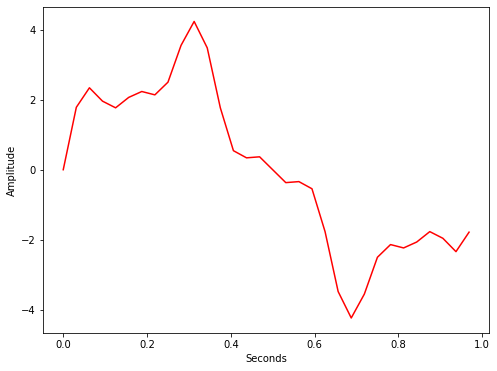

In [27]:
# sampling rate
sr = 32
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Seconds')

plt.show()

* [Python slicing](https://www.pythontutorial.net/advanced-python/python-slicing/), in particular **seq[start|stop|step]**
> * x[::2] start at zero, end at last of the samples, with step 2 (every other coeficient). Gives even coeficients.
> * x[1::2] Starts at first coeficient (odd), end at last coeficient, with step 2 (every other coeficient). Gives odd coeficients. 
* Numpy [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)
* Numpy [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [24]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        print("N: 1 (base case) returning x: ", x)
        return x
    else:
        print("N: ", N)
        print("x: ", x)
        X_even = FFT(x[::2])
        print("X_even: ", X_even)
        X_odd = FFT(x[1::2])
        print("X_odd: ", X_odd)       
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        print("factor: ", factor)  
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        print("X: ", X)
        return X

In [26]:
X=FFT(x)


N:  32
x:  [ 0.00000000e+00  1.78277039e+00  2.33939201e+00  1.95808267e+00
  1.76776695e+00  2.06508717e+00  2.23357836e+00  2.13770390e+00
  2.50000000e+00  3.55191746e+00  4.23357836e+00  3.47930073e+00
  1.76776695e+00  5.43869112e-01  3.39392013e-01  3.68556825e-01
  3.06161700e-16 -3.68556825e-01 -3.39392013e-01 -5.43869112e-01
 -1.76776695e+00 -3.47930073e+00 -4.23357836e+00 -3.55191746e+00
 -2.50000000e+00 -2.13770390e+00 -2.23357836e+00 -2.06508717e+00
 -1.76776695e+00 -1.95808267e+00 -2.33939201e+00 -1.78277039e+00]
N:  16
x:  [ 0.00000000e+00  2.33939201e+00  1.76776695e+00  2.23357836e+00
  2.50000000e+00  4.23357836e+00  1.76776695e+00  3.39392013e-01
  3.06161700e-16 -3.39392013e-01 -1.76776695e+00 -4.23357836e+00
 -2.50000000e+00 -2.23357836e+00 -1.76776695e+00 -2.33939201e+00]
N:  8
x:  [ 0.00000000e+00  1.76776695e+00  2.50000000e+00  1.76776695e+00
  3.06161700e-16 -1.76776695e+00 -2.50000000e+00 -1.76776695e+00]
N:  4
x:  [ 0.000000e+00  2.500000e+00  3.061617e-16 -2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


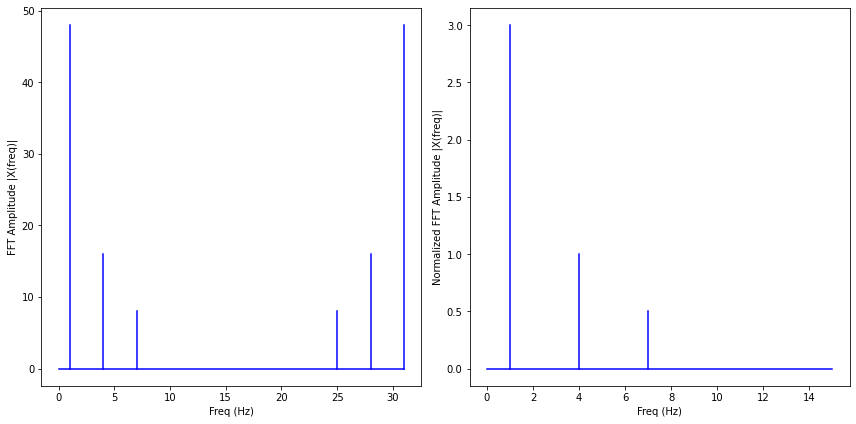

In [14]:
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()